# Undersøk korpus med metadata

Notebook for å undersøke korpus med metadata


In [2]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [53]:
def check_navn(navn, limit=2, remove='Ja Nei Unnskyld Ikke Ah Hmm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x}
    for w in remove:
        if w in r:
            del r[w]
    return r

# Select a list of books


In [49]:
bøker = nb.get_urn({'title':'krig%', 'author':"tolst%",'year':1800, 'next':250, 'limit':30})

In [50]:
bøker

[[2008102204034, 'Tolstoj, L.N.', 'Krig og fred', 2000],
 [2007051400011, 'Tolstoj, L.N.', 'Krig og fred', 1968],
 [2007032601072, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2007111900105, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2008101004071, 'Tolstoj, L.N.', 'Krig og fred', 2000],
 [2011061508081, 'Tolstoj, L.N.', 'Krig og fred', 2008],
 [2008110400150, 'Tolstoj, L.N.', 'Krig og fred', 2001],
 [2012011008041, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2008042400005, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2007111904099, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2011063022003, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2015091006105, 'Tolstoj, L.N.', 'Krig og fred', 2004],
 [2007041001053, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2008042300036, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2007050801009, 'Tolstoj, L.N.', 'Krig og fred', 1968],
 [2008102200095, 'Tolstoj, L.N.', 'Krig og fred', 2000],
 [2009042200103, 'Tolstoj, L.N.', 'Krig og fred', 2002],
 [2007050800051, 'Tolstoj, L.N.

### Assign a select book to variable 'bok'

In [51]:
bok = bøker[0]

Compute the candidates for characters - anything starting with a capital letter that could be a person name or place name

In [52]:
bok_navn = nb.navn(bok)

Edit the names, remove some words

In [54]:
bok_navn = check_navn(bok_navn, 5)
print([x for x in bok_navn])

['Aleksander', 'Anatole', 'Anatoles', 'Andrei', 'Andreievitsj', 'Andreis', 'Anisja', 'Anna', 'Araktsjejev', 'Austerlitz', 'Bagration', 'Balaga', 'Berg', 'Bezuchov', 'Bezuchovs', 'Bogdanovna', 'Bogutsjarovo', 'Bolkonskij', 'Boris', 'Bourienne', 'Buonaparte', 'Danila', 'Denisov', 'Denisovs', 'Deres', 'Dimmler', 'Dmitrievna', 'Dolochov', 'Dolochovs', 'Drubetskoi', 'Dunjasja', 'Duport', 'Fedja', 'Fjodorovna', 'George', 'Gory', 'Gud', 'Guds', 'Helene', 'Helenes', 'Hippolyte', 'Hør', 'Ilagin', 'Ilja', 'Jorza', 'Julie', 'Karagin', 'Karagins', 'Karaj', 'Kotsjubei', 'Kuragin', 'Lazarev', 'Liza', 'Lysye', 'Makarin', 'Maria', 'Marias', 'Meljukov', 'Michailovna', 'Milka', 'Mitja', 'Moskva', 'Métivier', 'Napoleon', 'Natalie', 'Natasja', 'Natasjas', 'Nesvitskij', 'Nikolai', 'Nikolais', 'Nå', 'Otradnoje', 'Pavlograd', 'Pavlovna', 'Peronskij', 'Petersburg', 'Petja', 'Pierre', 'Pierres', 'Preussen', 'Rastoptsjin', 'Rostov', 'Rostovs', 'Rugaj', 'Russland', 'Schongraben', 'Schoss', 'Semjon', 'Sjinsjin', 

In [55]:
network = nb.make_network(bok, bok_navn)

In [34]:
nb.central_betweenness_characters(network)

[('Moskva', 0.1331331522571528),
 ('Napoleon', 0.05162062370975184),
 ('Pierre', 0.04863148174288648),
 ('Deres', 0.03967692864581852),
 ('Andrej', 0.0394687416727849),
 ('Ja', 0.03296975595114888),
 ('Gud', 0.03284076618909522),
 ('Maria', 0.02445098500700349),
 ('Natasja', 0.0223826061060933),
 ('Napoleons', 0.01647245800556882)]

True

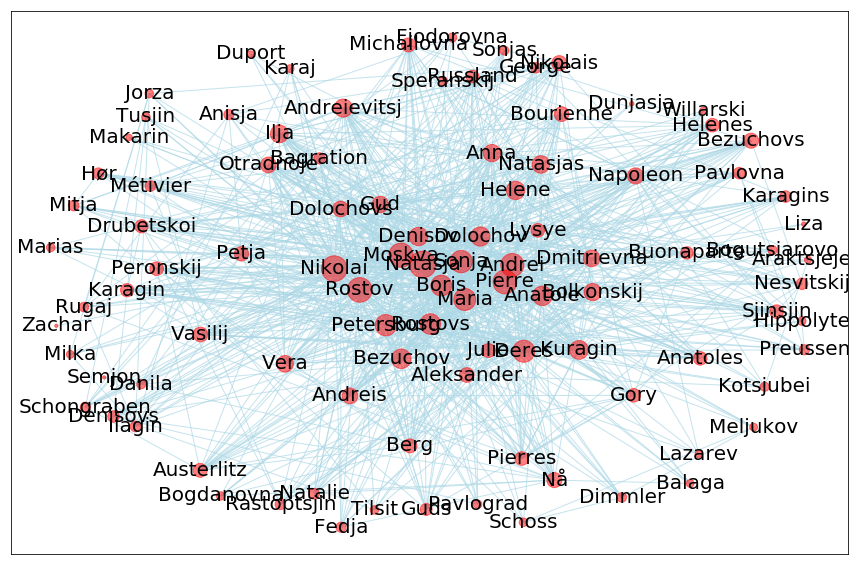

In [56]:
nb.draw_graph_centrality(network, k=2.5)